In [3]:
import pandas as pd
import numpy as np
import plotly as plot
import plotly.express as px
import plotly.graph_objs as go
import cufflinks as cf
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv("Heart_Disease_Prediction.csv")
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [8]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]

In [10]:
for i in range(len(info)):
    print(df.columns[i]+":\t\t\t"+info[i])


Age:			age
Sex:			1: male, 0: female
Chest pain type:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
BP:			resting blood pressure
Cholesterol:			 serum cholestoral in mg/dl
FBS over 120:			fasting blood sugar > 120 mg/dl
EKG results:			resting electrocardiographic results (values 0,1,2)
Max HR:			 maximum heart rate achieved
Exercise angina:			exercise induced angina
ST depression:			oldpeak = ST depression induced by exercise relative to rest
Slope of ST:			the slope of the peak exercise ST segment
Number of vessels fluro:			number of major vessels (0-3) colored by flourosopy
Thallium:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [14]:
df.groupby('Heart Disease').size()


Heart Disease
Absence     150
Presence    120
dtype: int64

In [15]:
df.groupby('Heart Disease').sum()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
Heart Disease,,,,,,,,,,,,,
Absence,7906,83,423,19330,36632,23,129,23750,23,93.4,210,43,568
Presence,6791,100,434,16133,30776,17,147,16663,66,190.1,218,138,700


In [17]:
df.shape


(270, 14)

In [19]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [23]:
df['Heart Disease'].unique()

array(['Presence', 'Absence'], dtype=object)

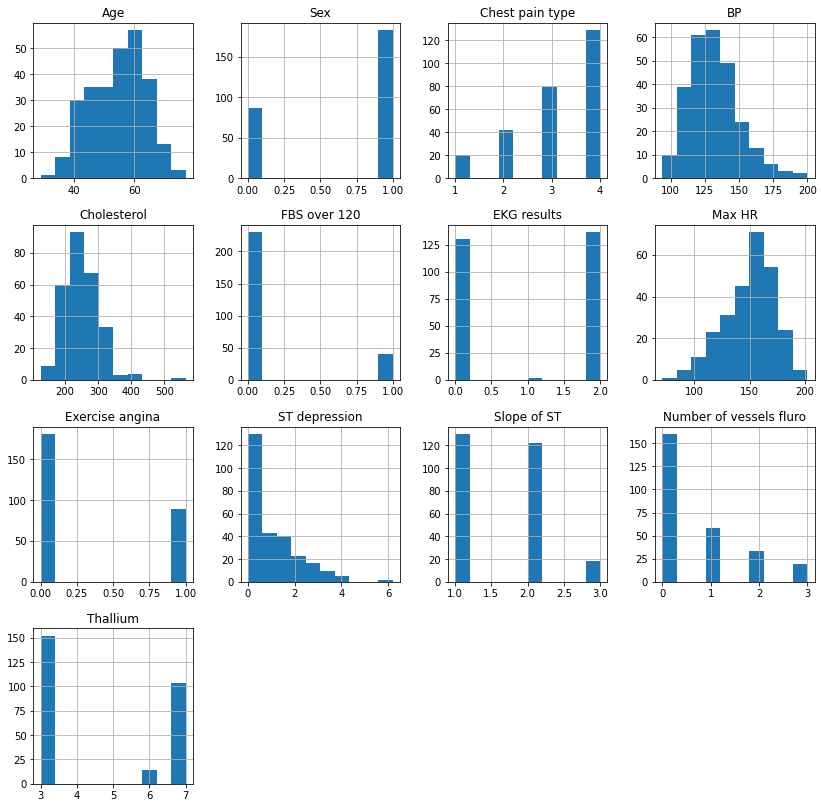

In [25]:
df.hist(figsize=(14,14))
plt.show()

In [27]:
df['Heart Disease'].value_counts()


Absence     150
Presence    120
Name: Heart Disease, dtype: int64

In [29]:
df['Heart Disease'].isnull()


0      False
1      False
2      False
3      False
4      False
       ...  
265    False
266    False
267    False
268    False
269    False
Name: Heart Disease, Length: 270, dtype: bool

In [31]:
df['Heart Disease'].sum()


'PresenceAbsencePresenceAbsenceAbsenceAbsencePresencePresencePresencePresenceAbsenceAbsenceAbsencePresenceAbsenceAbsencePresencePresenceAbsenceAbsencePresenceAbsenceAbsenceAbsenceAbsenceAbsenceAbsenceAbsencePresenceAbsencePresenceAbsenceAbsencePresencePresencePresencePresencePresenceAbsenceAbsencePresenceAbsenceAbsenceAbsencePresenceAbsencePresencePresencePresencePresencePresenceAbsenceAbsenceAbsenceAbsenceAbsencePresenceAbsencePresencePresenceAbsencePresenceAbsenceAbsenceAbsencePresenceAbsencePresenceAbsencePresencePresenceAbsenceAbsenceAbsenceAbsencePresenceAbsenceAbsenceAbsenceAbsencePresencePresencePresenceAbsenceAbsenceAbsenceAbsenceAbsenceAbsencePresenceAbsencePresencePresencePresencePresencePresenceAbsencePresenceAbsenceAbsenceAbsencePresenceAbsencePresencePresencePresenceAbsencePresencePresenceAbsencePresenceAbsencePresenceAbsenceAbsenceAbsencePresencePresenceAbsencePresencePresencePresencePresenceAbsenceAbsenceAbsencePresenceAbsenceAbsencePresencePresencePresenceAbsencePresenc

In [33]:
df['Heart Disease'].unique()

array(['Presence', 'Absence'], dtype=object)

In [34]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64